In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [82]:
df = pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [84]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [85]:
# Splitting data 20 percent for test rest for train

reading_score = df[['reading score']]
writing_score = df[['writing score']]
maths_score = df['math score']

x_read_train, x_read_test, y_read_train, y_read_test = train_test_split(reading_score,maths_score, test_size=0.2, random_state=3)
x_write_train, x_write_test, y_write_train, y_write_test = train_test_split(writing_score,maths_score, test_size=0.2, random_state=3)


Text(0, 0.5, 'Maths score')

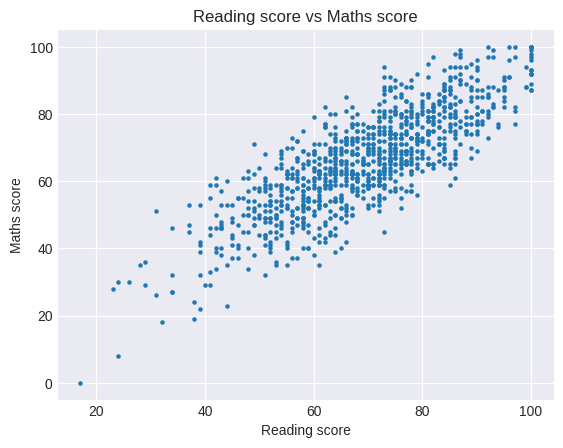

In [86]:
plt.scatter(reading_score,maths_score, s=5)
plt.title('Reading score vs Maths score')
plt.xlabel('Reading score')
plt.ylabel('Maths score')

Text(0, 0.5, 'Maths score')

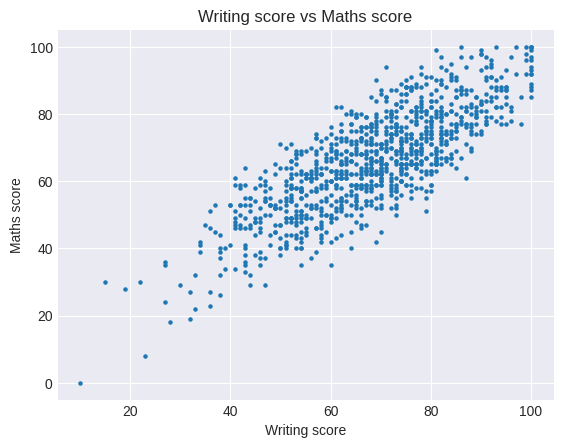

In [87]:
plt.scatter(writing_score,maths_score, s=5)
plt.title('Writing score vs Maths score')
plt.xlabel('Writing score')
plt.ylabel('Maths score')

In [88]:
read_model = LinearRegression()
read_model.fit(x_read_train,y_read_train)

write_model = LinearRegression()
write_model.fit(x_write_train,y_write_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [89]:
# Evaluating the model

predictions_from_readscore = read_model.predict(x_read_test)
predictions_from_writescore = write_model.predict(x_write_test)

In [90]:
print('Mean Squared Error For Reading Score:', mean_squared_error(predictions_from_readscore, y_read_test))
print('R2 Score For Reading Score:', r2_score(predictions_from_readscore, y_write_test))

Mean Squared Error For Reading Score: 76.11155103614335
R2 Score For Reading Score: 0.5070279313399031


<h4>Models prediction or probability of the prediction occurance is 76%</h4>

In [91]:
print('Mean Squared Error For Writitng Score:', mean_squared_error(predictions_from_writescore, y_write_test))
print('R2 Score For Reading Score:', r2_score(predictions_from_writescore, y_write_test))

Mean Squared Error For Writitng Score: 78.52920121778719
R2 Score For Reading Score: 0.4228017146794232


<h4>Models prediction or probability of the prediction occurance is 78%</h4>

Text(0, 0.5, 'Maths score')

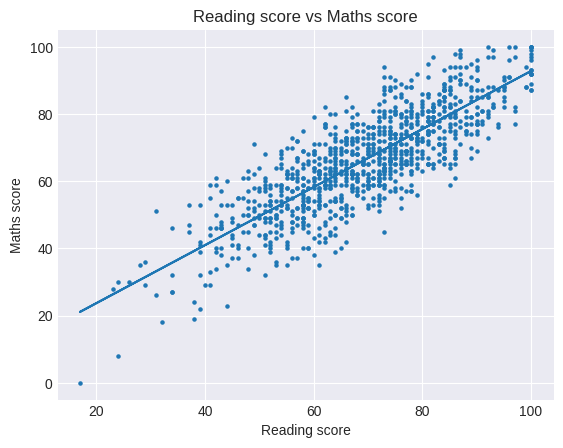

In [92]:
# Visualizing the best fit line
plt.style.use('seaborn-v0_8-darkgrid')
plt.scatter(reading_score,maths_score, s=5)
plt.plot(reading_score, read_model.predict(reading_score))
plt.title('Reading score vs Maths score')
plt.xlabel('Reading score')
plt.ylabel('Maths score')

PREDICTING SINGLE VALUE 
Actual value:100.0 Model prediction:[92.78121796]


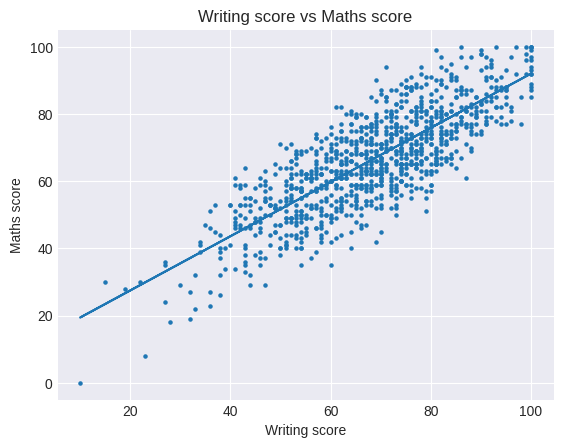

In [93]:
plt.scatter(writing_score,maths_score, s=5)
plt.plot(writing_score, write_model.predict(writing_score))
plt.title('Writing score vs Maths score')
plt.xlabel('Writing score')
plt.ylabel('Maths score')
random_test = pd.DataFrame({'reading score': 100},index=[1])
actual = df[df['math score'] == 100]['math score'].mean()
single_prediction = read_model.predict(random_test)
print(f"PREDICTING SINGLE VALUE \nActual value:{actual} Model prediction:{single_prediction}")
